<a href="https://colab.research.google.com/github/dunghoang2112/Artificial-Inttelligence/blob/main/Train_AI_genderPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1762 files belonging to 2 classes.
Using 1410 files for training.
Found 1762 files belonging to 2 classes.
Using 352 files for validation.
['Female', 'Male']
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                

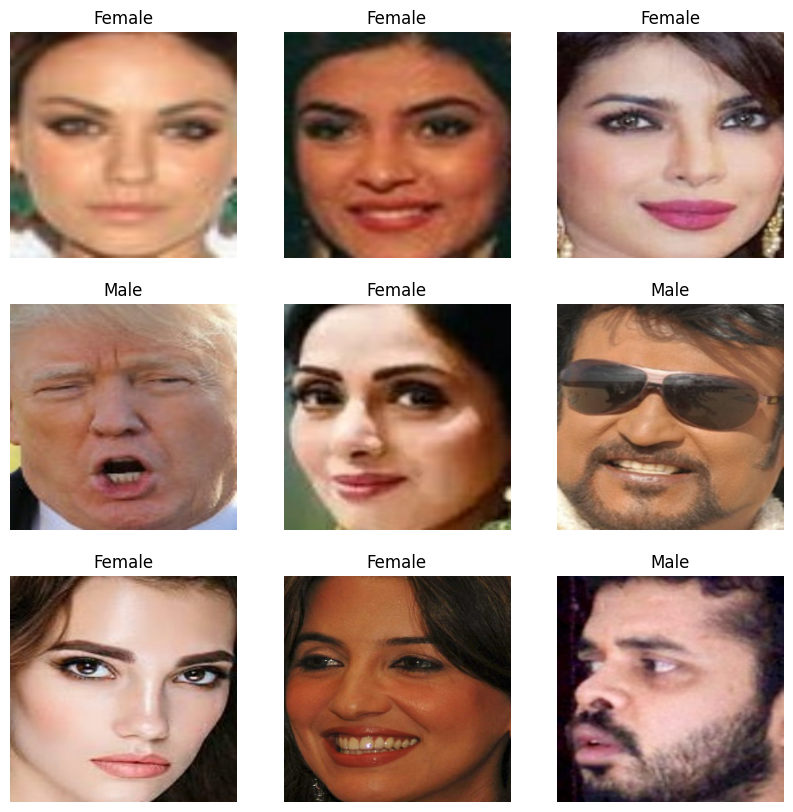

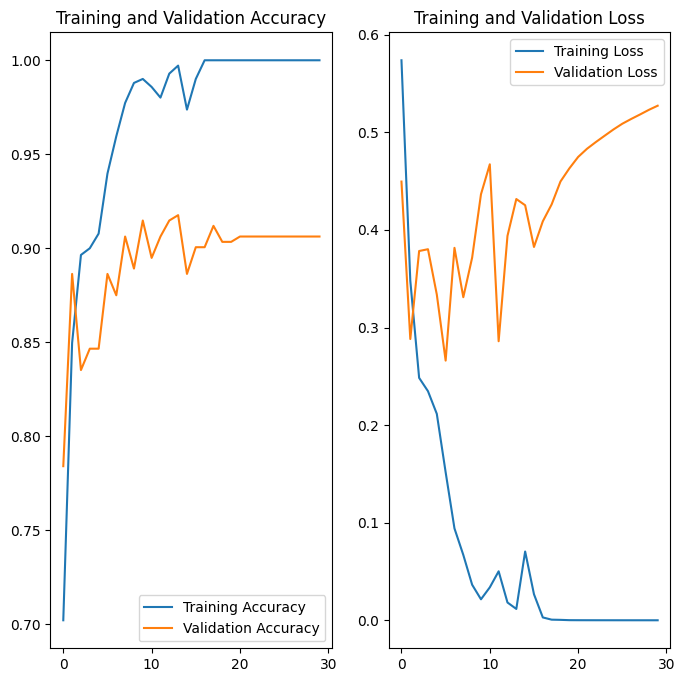

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from glob import glob
import tensorflow as tf
import pathlib
import keras
from keras import layers
from tensorflow.python.keras.models import load_model, Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Layer
from keras.preprocessing.image import ImageDataGenerator
data_dir = pathlib.Path('/content/drive/MyDrive/01')

image_count = len(list(data_dir.glob('*/*.jpg')))


batch_size = 32
img_height = 256
img_width = 256
train_ds = ImageDataGenerator(rescale=1/255,
                                   rotation_range=0.2, #xoay hình
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
val = ImageDataGenerator(rescale=1/255)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#plt.show()

num_classes = len(class_names)

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16,kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()


epochs=30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

model.save("model_2.h5")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 0s 88ms/step
Predicted gender: Nữ


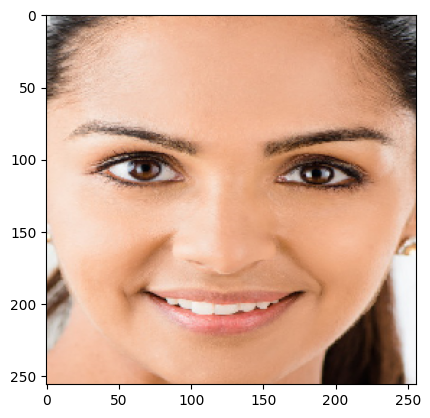

In [31]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.load_model('/content/model_2.h5')
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/01/Female/face_10.jpg', target_size=(256, 256))
plt.imshow(img)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predicted_gender ='Nam' if predictions[0][0] < 0.5 else 'Nữ'
print (f"Predicted gender:", predicted_gender) 